In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xyz = pd.read_table("06_tx_1965-2023_jrk.xyz", delim_whitespace=True)

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_4343/152992696.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz = pd.read_table("06_tx_1965-2023_jrk.xyz", delim_whitespace=True)


In [85]:
xyz

,X,Y,Z,T,loc,year
0,109682.41,558181.19,3.77,5-8-1965,900,1965
1,109677.53,558180.09,3.63,5-8-1965,900,1965
2,109672.65,558179.00,3.55,5-8-1965,900,1965
3,109667.77,558177.91,3.41,5-8-1965,900,1965
4,109662.89,558176.82,3.16,5-8-1965,900,1965
...,...,...,...,...,...,...
1380678,117558.08,579018.26,-1.44,3-4-2023,3081,2023
1380679,117551.46,579025.77,-1.70,3-4-2023,3081,2023
1380680,117544.85,579033.27,-1.88,3-4-2023,3081,2023
1380681,117538.24,579040.77,-2.14,3-4-2023,3081,2023


In [43]:
xyz["year"] = xyz["T"].str[-4:].astype(int)

[900, 915, 930, 945, 960, 976, 1000, 1001, 1013, 1033, 1053, 1073, 1093, 1108, 1128, 1148, 1168, 1190, 1210, 1230, 1249, 1269, 1289, 1298, 1312, 1332, 1352, 1372, 1392, 1410, 1430, 1450, 1470, 1490, 1506, 1526, 1546, 1566, 1586, 1604, 1624, 1644, 1664, 1684, 1703, 1723, 1743, 1763, 1778, 1793, 1813, 1833, 1853, 1873, 1893, 1912, 1932, 1952, 1972, 1992, 2011, 2031, 2051, 2071, 2091, 2111, 2131, 2151, 2171, 2191, 2211, 2231, 2251, 2271, 2291, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2901, 2917, 2937, 2957, 2977, 3001, 3021, 3041, 3061, 3081]


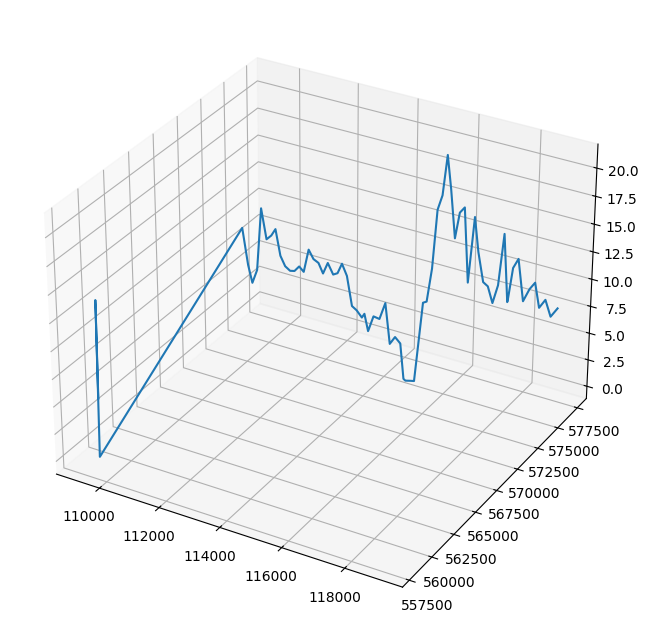

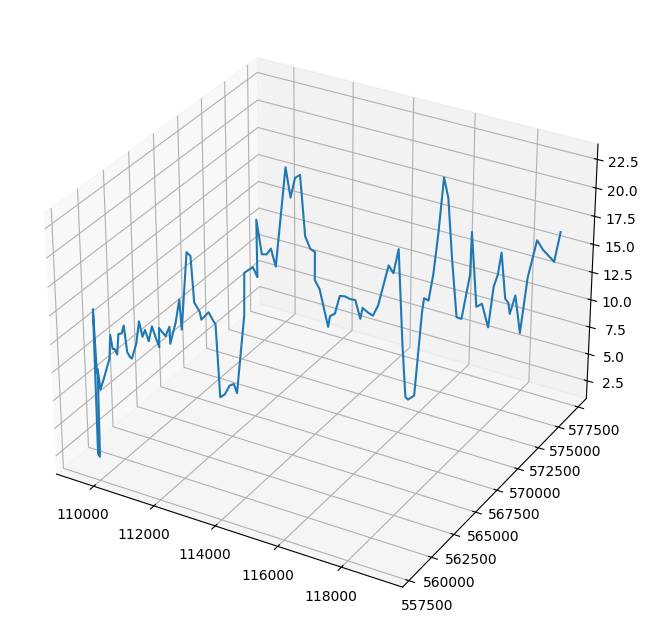

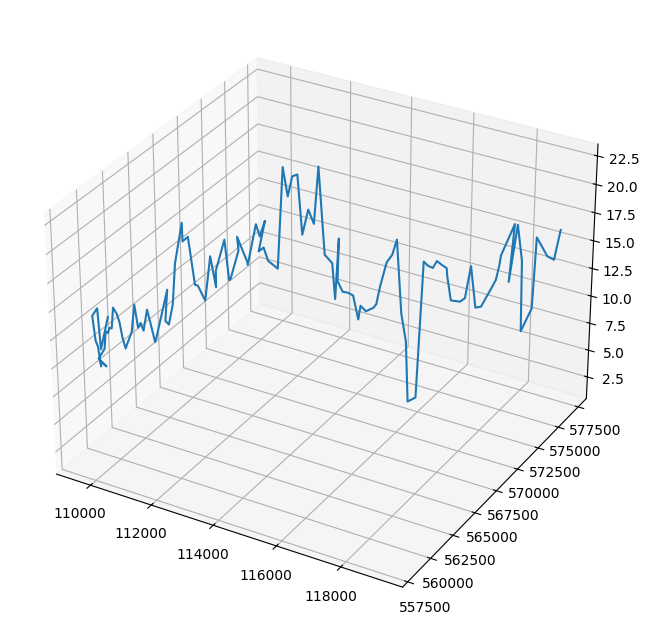

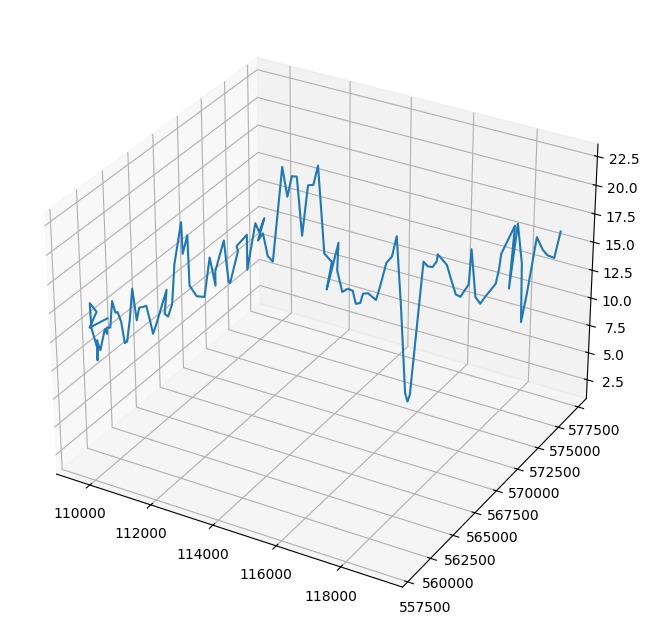

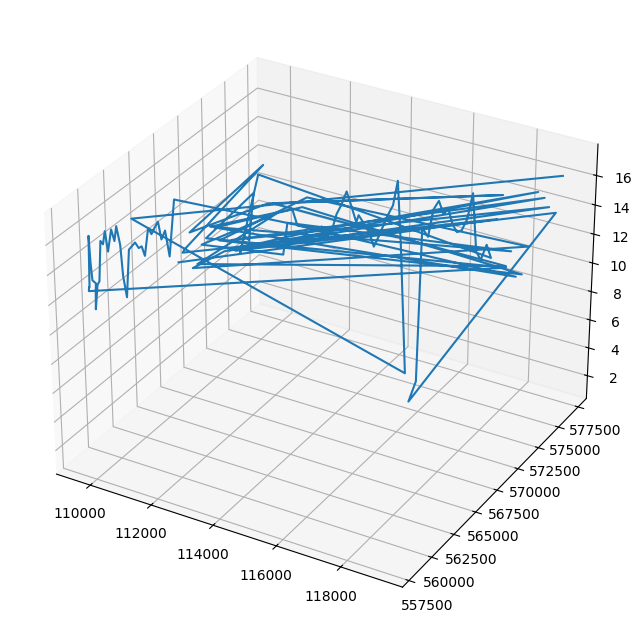

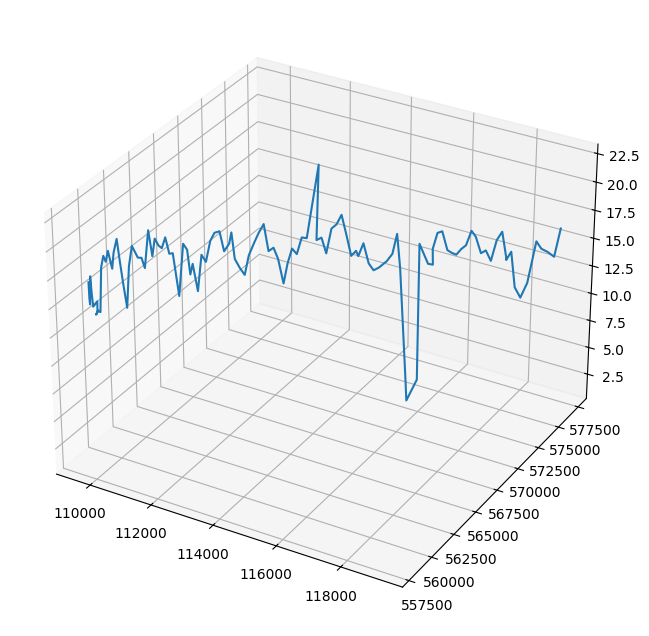

In [102]:
baseline = 1970
years = [year for year in xyz["year"].unique()]

for year in years: 
    concat_rows = []
    if year == baseline: 
        data_year = xyz[xyz["year"] == year] # slice dataframe based on year 
        locations = [location for location in data_year["loc"].unique()]
        for location in locations:  
            data_loc = data_year[data_year["loc"] == location]
            index_highest = data_loc['Z'].idxmax()
            # print(index_highest, data_loc.loc[index_highest, :].copy())
            concat_rows.append(data_loc.loc[index_highest, :].copy())
            # indexes_highest.append(index_highest)
            # row_highest = data_loc.iloc[index_highest]
            
            # fig = plt.figure(figsize = (8,8))
            # ax = plt.axes(projection='3d')
            # ax.grid()
            # ax.plot3D(data_loc["X"], data_loc["Y"], data_loc["Z"])
            # plt.show()
        
        baseline += 10 # add 10 years to baseline  
        data_highest = pd.DataFrame(concat_rows)
        
        # plt.figure();
        # plt.plot(data_highest["X"], data_highest["Y"]);
        # plt.title(f"{year}");
        # plt.show();
        
        # fig = plt.figure(figsize = (8,8))
        # ax = plt.axes(projection='3d')
        # ax.grid()
        # ax.plot3D(data_highest["X"], data_highest["Y"], data_highest["Z"])
        # plt.show()